In [15]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:
# Import necessary libraries
import pandas as pd

# Load the data using a relative path
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",  
    index_col="coin_id"  # Set 'coin_id' as the index
)

# Display sample data
df_market_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [17]:
# Generate summary statistics
df_market_data.describe()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [21]:
# Check for missing values
df_market_data.isnull().sum()


price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64

In [23]:
# Select only the relevant features (24h and 7d price changes)
crypto_features = df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d']]


In [25]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [29]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler


In [31]:
# Select only the relevant features (24h and 7d price changes)
crypto_features = df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d']]

In [33]:
# Apply StandardScaler for normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_features)

In [35]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=crypto_features.columns)

# Copy the crypto names from the original DataFrame
df_scaled["coin_id"] = df_market_data.index

# Set the coin_id column as index
df_scaled.set_index("coin_id", inplace=True)


# Display the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d
coin_id,,
bitcoin,0.508529,0.493193
ethereum,0.185446,0.934445
tether,0.021774,-0.706337
ripple,-0.040764,-0.810928
bitcoin-cash,1.193036,2.000959


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [39]:
# Import necessary libraries
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [43]:
# Ensure the memory leak issue is prevented
os.environ["OMP_NUM_THREADS"] = "1"

In [45]:
# Load the dataset
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display the first few rows
df_market_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [47]:
# Select only the relevant features (24h and 7d price changes)
crypto_features = df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d']]

# Apply StandardScaler for normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_features)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=crypto_features.columns, index=df_market_data.index)

# Display the first few rows of the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d
coin_id,,
bitcoin,0.508529,0.493193
ethereum,0.185446,0.934445
tether,0.021774,-0.706337
ripple,-0.040764,-0.810928
bitcoin-cash,1.193036,2.000959


In [49]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [51]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # 2. Fit the model to the data using `df_scaled`
    kmeans.fit(df_scaled)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

In [52]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


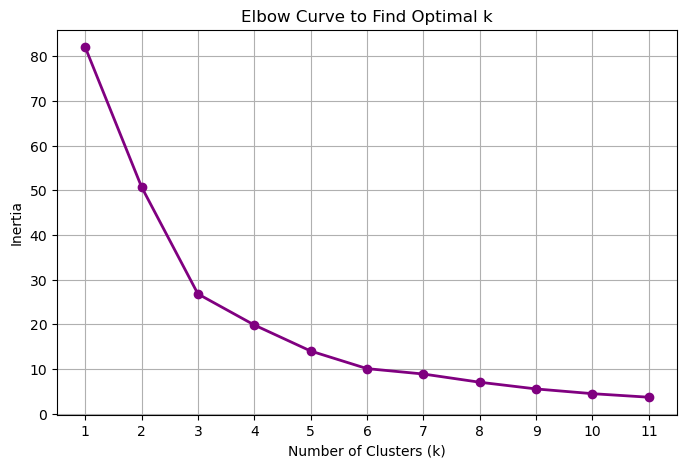

In [53]:
# Plot a line chart with all the inertia values computed
plt.figure(figsize=(8, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o", linestyle="-", color="#800080", linewidth=2)  # Morado
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Find Optimal k")
plt.xticks(k_values)
plt.grid()
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4, as it represents the point where the inertia significantly decreases before leveling off, indicating the optimal number of clusters.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [60]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Replace this with your optimal k value from the elbow curve
kmeans_model = KMeans(n_clusters=best_k, random_state=42, n_init=10)

In [62]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_scaled)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [64]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 1 1 1 1 3 3 0 0 0 1 3 3 0 0 1 0 3 3 0 0 0 0 3 0 3 0 3 0 2 3 0 3 3
 0 3 0 3]


In [66]:
# Create a copy of the scaled DataFrame
df_clusters = df_scaled.copy()

In [68]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clusters["Cluster"] = clusters

# Display the copy of the scaled DataFrame
df_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,Cluster
coin_id,,,
bitcoin,0.508529,0.493193,3
ethereum,0.185446,0.934445,3
tether,0.021774,-0.706337,0
ripple,-0.040764,-0.810928,0
bitcoin-cash,1.193036,2.000959,1


In [70]:
import hvplot.pandas
import holoviews as hv
from holoviews import opts

# Definir colores para cada cluster
cmap = ["#E74C3C", "#3498DB", "#F1C40F", "#8E44AD"]  # Rojo, Azul, Amarillo, Púrpura

# Crear etiquetas de recomendaciones en inglés
recommendations = {
    0: "🛒 Buy Opportunities",
    1: "🚀 Trending Up",
    2: "⚠️ Volatile Assets",
    3: "🏦 Stable Cryptos"
}

# Crear la gráfica con hvPlot
scatter_plot = df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    cmap=cmap,
    size=100,
    alpha=0.9,
    hover_cols=["Cluster", "coin_id"],  # Agrega información extra al pasar el mouse
    title="💡 Crypto Clustering with AI Insights",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=900, height=600
)

# Crear la leyenda como anotaciones en la parte superior izquierda
legend_annotations = hv.Overlay([
    hv.Text(-4, 2.5 - i * 0.5, recommendations[i]).opts(text_color=cmap[i], fontsize=14)
    for i in range(4)
])

# Superponer el scatter plot con la leyenda en la esquina superior izquierda
final_plot = scatter_plot * legend_annotations

# Mostrar el gráfico final
final_plot


:Overlay
   .Scatter.I :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Text.I    :Text   [x,y]
   .Text.II   :Text   [x,y]
   .Text.III  :Text   [x,y]
   .Text.IV   :Text   [x,y]

---

### Optimize Clusters with Principal Component Analysis.

In [74]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

In [76]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=2)

In [78]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
pca_data = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(
    data=pca_data, 
    columns=["PC1", "PC2"],  # Adjusted to two components
    index=df_scaled.index
)

# View the scaled PCA data
df_pca.head()

,PC1,PC2
coin_id,,
bitcoin,-0.708325,-0.010844
ethereum,-0.791882,0.529622
tether,0.484059,-0.514852
ripple,0.602238,-0.544588
bitcoin-cash,-2.258496,0.571288


In [80]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance for each principal component
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.2%} of variance explained")


Principal Component 1: 58.48% of variance explained
Principal Component 2: 41.52% of variance explained


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 100%.

In [83]:
# Check how many features are available in df_scaled
n_features = df_scaled.shape[1]

# Create the PCA model with the correct number of components
pca = PCA(n_components=n_features)

# Apply PCA transformation to reduce dimensionality
pca_data = pca.fit_transform(df_scaled)

# Create a new DataFrame with the principal components
columns = [f"PC{i+1}" for i in range(n_features)]  # Generate dynamic column names
df_pca = pd.DataFrame(
    data=pca_data,
    columns=columns,  
    index=df_scaled.index
)

# Copy the cryptocurrency names from the original DataFrame
df_pca["coin_id"] = df_market_data.index

# Set "coin_id" as the index
df_pca.set_index("coin_id", inplace=True)

# Display the first few rows of the PCA DataFrame
df_pca.head()


,PC1,PC2
coin_id,,
bitcoin,-0.708325,-0.010844
ethereum,-0.791882,0.529622
tether,0.484059,-0.514852
ripple,0.602238,-0.544588
bitcoin-cash,-2.258496,0.571288


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [87]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [89]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # 2. Fit the model to the data using `df_pca`
    kmeans.fit(df_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

In [90]:
# Ensure both lists have the same length before creating the DataFrame
min_length = min(len(k_values), len(inertia_values))

elbow_data = {
    "k": k_values[:min_length],  # Ensure both lists are the same length
    "inertia": inertia_values[:min_length]
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


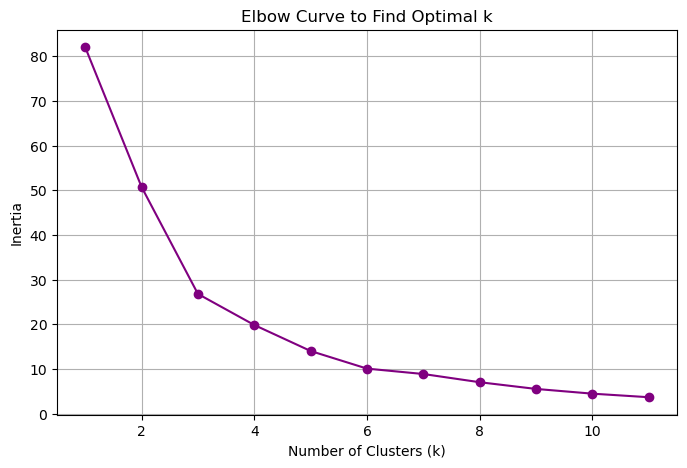

In [91]:
# Plot a line chart with all the inertia values computed
# and the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Create the Elbow Curve plot
plt.figure(figsize=(8, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o", linestyle="-", color="purple")

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Find Optimal k")

# Show grid for better visualization
plt.grid(True)

# Display the plot
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k is 4, as this is the point where the curve starts to flatten, indicating a less significant decrease in inertia.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** If the best k using the original data was also 4, then there is no difference. If it was different, this suggests that dimensionality reduction with PCA affected the optimal clustering.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [96]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=best_k, random_state=42, n_init=10)

In [99]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [101]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_pca = kmeans_pca.predict(df_pca)

# Print the resulting array of cluster values.
print(clusters_pca)

[3 3 0 0 1 1 1 1 3 3 0 0 0 1 3 3 0 0 1 0 3 3 0 0 0 0 3 0 3 0 3 0 2 3 0 3 3
 0 3 0 3]


In [103]:
# Create a copy of the scaled PCA DataFrame
df_pca_clusters = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_clusters["Cluster"] = clusters_pca

# Display the copy of the scaled PCA DataFrame
df_pca_clusters.head()

,PC1,PC2,Cluster
coin_id,,,
bitcoin,-0.708325,-0.010844,3
ethereum,-0.791882,0.529622,3
tether,0.484059,-0.514852,0
ripple,0.602238,-0.544588,0
bitcoin-cash,-2.258496,0.571288,1


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
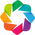

:Overlay
   .Scatter.I   :Scatter   [PC1]   (PC2,Color,coin_id)
   .NdOverlay.I :NdOverlay   [Element]
      :Text   [x,y]

In [105]:
import holoviews as hv
hv.extension('bokeh')

# Define corrected categories and colors
categories_pca = {
    0: ("🛒 Buy Opportunities", "#E74C3C"),
    1: ("🚀 Trending Up", "#F1C40F"),
    2: ("⚠️ Volatile Assets", "#3498DB"),
    3: ("🏛 Stable Cryptos", "#8E44AD")
}

# Apply categories and colors to the dataframe
df_pca_clusters["Category"] = df_pca_clusters["Cluster"].map(lambda x: categories_pca.get(x, ("Unknown", "#000000"))[0])
df_pca_clusters["Color"] = df_pca_clusters["Cluster"].map(lambda x: categories_pca.get(x, ("Unknown", "#000000"))[1])

# Create scatter plot
scatter_plot_pca = df_pca_clusters.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    color="Color",  
    hover_cols=["coin_id"],  
    title="📊 Crypto Clustering with PCA Insights",
    width=950, height=650
)

# Create custom legend with better alignment
legend_pca = hv.NdOverlay({
    label: hv.Text(2.5, 2 - i * 0.6, label, fontsize=12, halign="left").opts(text_color=color) 
    for i, (label, color) in enumerate(categories_pca.values())
})

# Combine scatter plot and legend
final_plot_pca = scatter_plot_pca * legend_pca
final_plot_pca


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [108]:
# Import necessary libraries
from sklearn.cluster import KMeans

# Create a list of k values
k_values_pca = list(range(1, 12))

# Empty list to store inertia values for PCA data
inertia_values_pca = []

# Loop through each k value to compute inertia
for k in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)  # Usa df_pca en lugar de df_scaled
    inertia_values_pca.append(kmeans_pca.inertia_)

# Ensure both lists have the same length
min_length = min(len(k_values_pca), len(inertia_values_pca))

# Create a dictionary for the PCA elbow data
elbow_data_pca = {
    "k": k_values_pca[:min_length],
    "inertia": inertia_values_pca[:min_length]
}

# Convert to DataFrame
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display to verify
df_elbow_pca.head()


,k,inertia
0,1,82.000000
1,2,50.727034
2,3,26.792512
3,4,19.840983
4,5,14.019787


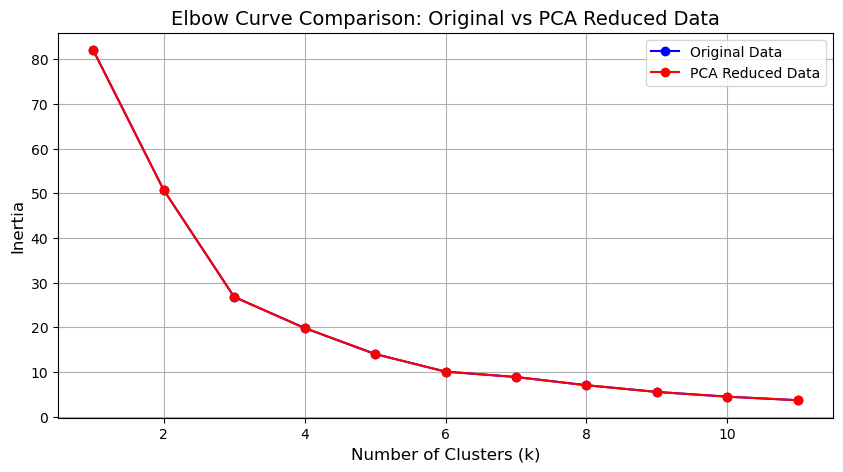

In [109]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots(figsize=(10,5))

# Plot original data Elbow curve
ax.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-', color='blue', label="Original Data")

# Plot PCA-reduced data Elbow curve
ax.plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o', linestyle='-', color='red', label="PCA Reduced Data")

# Formatting
ax.set_title("Elbow Curve Comparison: Original vs PCA Reduced Data", fontsize=14)
ax.set_xlabel("Number of Clusters (k)", fontsize=12)
ax.set_ylabel("Inertia", fontsize=12)
ax.legend()
plt.grid(True)

# Show plot
plt.show()


In [110]:
# Verifica si df_clusters está definido
try:
    print(df_clusters.head())
except NameError:
    print("df_clusters no está definido. Se procederá a crearlo.")

    # Crear df_clusters a partir del dataset original (ajusta según el dataset que estés usando)
    df_clusters = df_original.copy()  # Asegurar que partimos del dataset original
    df_clusters["Cluster"] = kmeans_model.predict(df_scaled)  # Asigna los clusters generados

    print("df_clusters ha sido creado correctamente.")
    print(df_clusters.head())


              price_change_percentage_24h  price_change_percentage_7d  Cluster
coin_id                                                                       
bitcoin                          0.508529                    0.493193        3
ethereum                         0.185446                    0.934445        3
tether                           0.021774                   -0.706337        0
ripple                          -0.040764                   -0.810928        0
bitcoin-cash                     1.193036                    2.000959        1


In [116]:
import hvplot.pandas
import holoviews as hv
from holoviews import opts

hv.extension('bokeh')

# Definir colores y etiquetas
cluster_labels = {
    0: ("🛒 Buy Opportunities", "#E74C3C"),
    1: ("🚀 Trending Up", "#F1C40F"),
    2: ("⚠️ Volatile Assets", "#3498DB"),
    3: ("🏛 Stable Cryptos", "#8E44AD")
}

cmap = [color for _, color in cluster_labels.values()]

### 📌 Gráfica Before PCA
scatter_plot_before = df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    cmap=cmap,
    size=80,  # Reduciendo tamaño de los puntos
    alpha=0.9,
    hover_cols=["Cluster", "coin_id"],  
    title="💡 Clusters Before PCA",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=450, height=400  # Tamaño más compacto
)

# Crear la leyenda como anotaciones
legend_before = hv.Overlay([
    hv.Text(-4, 2 - i * 0.5, label, fontsize=10, halign="left").opts(text_color=color)
    for i, (label, color) in enumerate(cluster_labels.values())
])

### 📌 Gráfica After PCA
scatter_plot_after = df_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    cmap=cmap,
    size=80,  # Reduciendo tamaño de los puntos
    alpha=0.9,
    hover_cols=["Cluster", "coin_id"],  
    title="💡 Clusters After PCA",
    xlabel="PC1",
    ylabel="PC2",
    width=450, height=400  # Tamaño más compacto
)

# Crear la leyenda como anotaciones
legend_after = hv.Overlay([
    hv.Text(2, 2 - i * 0.5, label, fontsize=10, halign="left").opts(text_color=color)
    for i, (label, color) in enumerate(cluster_labels.values())
])

# Mostrar ambas gráficas juntas
final_plot = (scatter_plot_before * legend_before + scatter_plot_after * legend_after).cols(2)
final_plot


:Layout
   .Overlay.I  :Overlay
      .Scatter.I :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
      .Text.I    :Text   [x,y]
      .Text.II   :Text   [x,y]
      .Text.III  :Text   [x,y]
      .Text.IV   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [PC1]   (PC2,Cluster,coin_id)
      .Text.I    :Text   [x,y]
      .Text.II   :Text   [x,y]
      .Text.III  :Text   [x,y]
      .Text.IV   :Text   [x,y]

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Reducing the number of features using PCA helps simplify the clustering process while preserving most of the data variance. Before PCA, the clusters were more dispersed due to high-dimensional noise and less-defined separation between groups. After PCA, the clusters appear more compact and structured, making it easier to interpret trends. However, reducing features may also lead to the loss of some granular insights, which could impact the accuracy of clustering for more nuanced patterns. Overall, PCA enhances efficiency and reduces computational complexity but requires balancing between dimensionality reduction and information retention.